<div style="background-color:orange;text-align:center;vertical-align:middle"><table><tr><td><pre>
<!-- <center><h1><font color='darkorange'>Kodluyoruz Academy</font></h1></center> -->
<p align="center"><img src="https://drive.google.com/uc?id=1XaFRw2Ga--G2TEtlXTau1iuVH0YDTbzC" width=100></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/02/kodluyoruz_logo_sosyalgirisim.png-->
<p align="center"><img src="https://drive.google.com/uc?id=1KwcDmzeT0IzJKo_p-opUtwQu75tXbnt7" width=500></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/03/Frame.png-->
<center><h1><em><font color='darkorange'>Bootcamp - Applied Data Science</font></em></h1></center>
<center><h2><em><font color='darkorange'>February-2020</font></em></h2></center>
<table style="width:35%">
    <tr>
        <td><b>Project:</b></td>
        <td>CREDIT SCORING CLASSIFICATION </td>
    </tr>
    <tr>
        <td><b>Module-1:</b></td>
        <td>Supervised Learning</td>
    </tr>
    <tr>
        <td><b>Session-1:</b></td>
        <td>Binary Classification</td>
    </tr>
    <tr>
        <td><b>Case:</b></td>
        <td>Decision Making for Approval of Credit Limits</td>
    </tr>
</table>
</pre></td></tr></table></div>

# CREDIT SCORING CLASSIFICATION
Bir bankanın tüketici kredisi departmanı, ev sermayesi kredi limitlerinin onaylanması için karar verme sürecini otomatikleştirmek istiyor. Bunu yapmak için; ampirik olarak üretilmiş ve istatistiksel olarak sağlam bir kredi puanlama modeli oluşturulacak. Aynı zamanda, Eşit Kredi Fırsatı Yasası(Equal Credit Opportunity Act)'nın tavsiyelerinin göz ardı edilmemesi gerekiyor. Model, mevcut kredi yüklenimi süreci ile kredi verilen son başvuru sahiplerinden toplanan verilere göre oluşturulacaktır. 

# Veri Seti Hakkında

Ev Sermayesi veri kümesi (HMEQ), 5.960 yeni ev sermayesi kredisi için mevcut durumları  ve kredi performans bilgilerini içerir. Hedef (BAD), bir başvuranın nihayetinde temerrüde düştüğünü veya ciddi şekilde suçlu olup olmadığını gösteren ikili bir değişkendir. Bu olumsuz sonuç 1.189 durumda (% 20) meydana geldi. Her başvuru sahibi için 12 girdi değişkeni kaydedilmiştir.

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import io
from google.colab import files
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Verinin İncelenmesi

In [0]:
uploaded = files.upload()

Saving hmeq.csv to hmeq.csv


In [0]:
data = pd.read_csv('hmeq.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


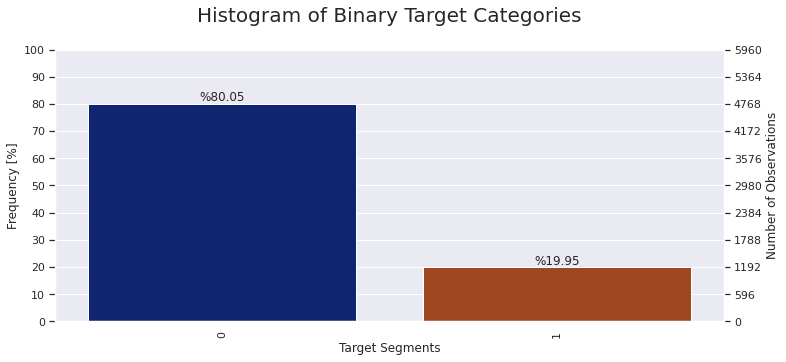

In [0]:
# Veri setindeki değişkenlerin görsel analizini histogram çizdirerek yapmak için fonksiyon yazılıyor.
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import psutil
import os
import scipy as sp
import matplotlib.ticker as ticker
import seaborn as sns
def Histogram(data,variable):
  ncount = len(data)
  ax = sns.countplot(x = variable, data = data, palette = 'dark')
  sns.set(font_scale = 1)
  ax.set_xlabel('Target Segments')
  plt.xticks(rotation = 90)
  ax.set_ylabel('Number of Observations')
  fig = plt.gcf()
  fig.set_size_inches(12,5)
  # Ters tarafa da bir dikey eksen oluşturuluyor.
  ax2 = ax.twinx()
  ax2.yaxis.tick_left()
  ax.yaxis.tick_right()
  ax.yaxis.set_label_position('right')
  ax2.yaxis.set_label_position('left')
  ax2.set_ylabel('Frequency [%]')
  for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('%{:.2f}'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
  # Use a LinearLocator to ensure the correct number of ticks
  ax.yaxis.set_major_locator(ticker.LinearLocator(11))
  # Fix the frequency range to 0-100
  ax2.set_ylim(0,100)
  ax.set_ylim(0,ncount)
  # And use a MultipleLocator to ensure a tick spacing of 10
  ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
  # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
  ax2.grid(None)
  plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
  plt.show()
  #plt.savefig('col.png')
  del ncount, x, y 
Histogram(data, 'BAD')

# Kolonların açıklamaları :
* BAD  : Hedef değer, kredi battı mı batmadı mı.
* LOAN : Kredi talebi.
* MORTDUE  : İpoteğe ödenilecek tutar.
* VALUE  : İpotek edilen varlığın toplam değeri.
* REASON : Kredi talebinin sebebi.(Ev için ya da var olan borcu yapılandırmak için
* JOB  : Meslek.
* YOJ : Mevcut işte geçirilen süre.
* DEROG  : Geçmişte yaşanan ciddi gecikme sayısı.
* DELINQ : Ödenmeyen kredi sayısı.
* CLAGE  : En eski kredinin yaşı(ay olarak)
* NINQ : Kredi sorgu sayısı.
* CLNO : Kredi limiti sayısı.
* DEBTINC  : Borç/Gelir oranı.

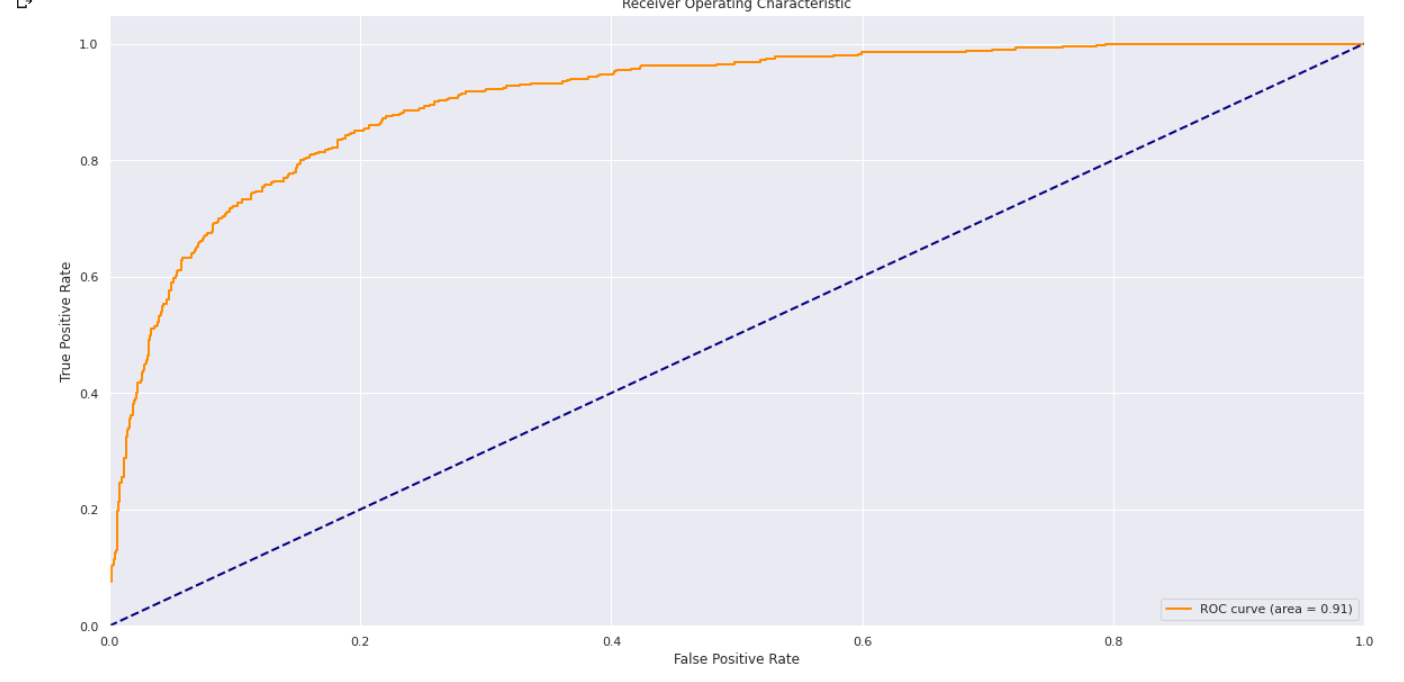

In [0]:
data['INDEX'] = range(1,len(data)+1)
data.set_index('INDEX',inplace = True) # Index oluşturuldu .
data.tail(10) 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
INDEX,,,,,,,,,,,,,
5951,0,87500,55938.0,86794.0,DebtCon,Other,15.0,0.0,0.0,223.881040,0.0,16.0,36.753653
5952,0,88300,54004.0,94838.0,DebtCon,Other,16.0,0.0,0.0,193.702051,0.0,15.0,36.262691
5953,0,88500,50240.0,94687.0,DebtCon,Other,16.0,0.0,0.0,214.426206,0.0,16.0,34.751158
5954,0,88800,53307.0,94058.0,DebtCon,Other,16.0,0.0,0.0,218.304978,0.0,15.0,34.242465
5955,0,88900,48919.0,93371.0,DebtCon,Other,15.0,0.0,1.0,205.650159,0.0,15.0,34.818262
5956,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5957,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5958,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5959,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [0]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [0]:
data.corr(method = 'pearson') # Korelasyonlar incelendi .

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.048219,-0.029954,-0.060238,0.276081,0.354107,-0.170499,0.174980,-0.004157,0.199835
LOAN,-0.075099,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,-0.048219,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,-0.029954,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,-0.060238,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,0.276081,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,0.354107,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,-0.170499,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.174980,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,-0.004157,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539


In [0]:
print('Analysis of DELINQ when client defaulted on loan :')
print(data[data['BAD']==1].DELINQ.describe())
print('')
print('Analysis of DELINQ when loan repaid :')
print(data[data['BAD']==0].DELINQ.describe())
# Hedef değerle en yüksek korelasyon katsayısına sahip değişkenin; hedef değerin durumuna göre istatiksel analizi yapıldı.

Analysis of DELINQ when client defaulted on loan :
count    1117.000000
mean        1.229185
std         1.902961
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        15.000000
Name: DELINQ, dtype: float64

Analysis of DELINQ when loan repaid :
count    4263.000000
mean        0.245133
std         0.674124
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: DELINQ, dtype: float64


# Üstünkörü Veri Analizi
Başta eksik değerleri görme amacı güdülerek, veri setinin kabaca analizini yapacak fonksiyon oluşturuluyor. Böylece ileriki adımlarda nasıl bir yol izleneceğine dair ipuçları elde edilecek.

In [0]:
def SimpleDataAnalysis(data): # Başta eksik değerleri görme amacı güdülerek , veri setinin kabaca analizini yapacak fonksiyon oluşturuluyor. 
  import psutil, os, gc, time
  import io
  import pandas as pd
  from itertools import groupby 
  print('Simple data analysis has began :\n')
  proc=psutil.Process(os.getpid())
  gc.collect()
  mem_0=proc.memory_info().rss
  start_time=time.time()

  # Bir sonraki adımda toplanacak verileri doldurmak üzere boş listeler oluşturuluyor :
  entry_length_list = [] # Boş ya da dolu tüm satırlardaki girdileri eklenmesi için oluşturulan liste.
  variable_name_list = []
  total_entry_list = [] # Eksik veri olmayan girdilerin doldurulacağı liste.
  number_of_missing_values_list = []
  ratio_of_missing_values_list = []
  data_types_list = []
  unique_values_list = []
  number_of_unique_values_list = []

  for col in data.columns:
    buffer = io.StringIO()
    data[[col]].info(buf=buffer)
    data_info = buffer.getvalue().split('\n')
    entry_length = int(data_info[1].split(' ')[1])
    
    a = [''.join(j).strip() for sub in data_info[5].split(' ')
    for k, j in groupby(sub, str.isdigit)]
    
    variable_name = a[1]
    total_entry = int(a[2])
    number_of_missing_values = entry_length-total_entry
    ratio_of_missing_values = round(float(number_of_missing_values/entry_length),4)
    data_type =a[4]
    number_of_unique_values = len(data[col].unique())
    unique_values = data[col].unique()

    # Toplanan veriler listelere ekleniyor :

    entry_length_list.append(entry_length)
    variable_name_list.append(variable_name)
    total_entry_list.append(total_entry)
    number_of_missing_values_list.append(number_of_missing_values)
    ratio_of_missing_values_list.append(ratio_of_missing_values)
    data_types_list.append(data_type)
    unique_values_list.append(unique_values)
    number_of_unique_values_list.append(number_of_unique_values)

  data_info_data=pd.DataFrame({'Variable_Name':variable_name_list,'Total_Entry(#)':total_entry_list,'Missing_Value(#)':number_of_missing_values_list,'Missing_Value(%)':ratio_of_missing_values_list,'Data_Type':data_types_list,'Unique_Values':unique_values_list,'Unique_Value(#)':number_of_unique_values_list})
  print("Simple data analysis has been completed in %s minutes !"%((time.time()-start_time)/60))

  return data_info_data.sort_values(by='Missing_Value(%)',ascending=False)

In [0]:
data_Analysis = SimpleDataAnalysis(data)
data_Analysis

Simple data analysis has began :

Simple data analysis has been completed in 0.0007892052332560221 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
12,DEBTINC,4693,1267,0.2126,float,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694
7,DEROG,5252,708,0.1188,float,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12
8,DELINQ,5380,580,0.0973,float,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15
2,MORTDUE,5442,518,0.0869,float,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054
6,YOJ,5445,515,0.0864,float,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100
10,NINQ,5450,510,0.0856,float,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17
9,CLAGE,5652,308,0.0517,float,"[94.366666667, 121.83333333, 149.46666667, nan...",5315
5,JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7
4,REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3
11,CLNO,5738,222,0.0372,float,"[9.0, 14.0, 10.0, nan, 8.0, 17.0, 12.0, 13.0, ...",63


Değişken tipleri de analize eklendi .

In [0]:
data_Analysis['Variable_Type']=['Continuous','Cardinal','Cardinal','Continuous','Cardinal','Cardinal','Continuous','Nominal','Nominal','Cardinal','Continuous','Ordinal','Continuous']
data_Analysis
# Değişkenlerin tipleri de analize eklendi.

,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#),Variable_Type
12,DEBTINC,4693,1267,0.2126,float,"[nan, 37.113613558000004, 36.884894093, 3.7113...",4694,Continuous
7,DEROG,5252,708,0.1188,float,"[0.0, nan, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 7.0, ...",12,Cardinal
8,DELINQ,5380,580,0.0973,float,"[0.0, 2.0, nan, 1.0, 6.0, 15.0, 4.0, 3.0, 5.0,...",15,Cardinal
2,MORTDUE,5442,518,0.0869,float,"[25860.0, 70053.0, 13500.0, nan, 97800.0, 3054...",5054,Continuous
6,YOJ,5445,515,0.0864,float,"[10.5, 7.0, 4.0, nan, 3.0, 9.0, 5.0, 11.0, 16....",100,Cardinal
10,NINQ,5450,510,0.0856,float,"[1.0, 0.0, nan, 2.0, 3.0, 5.0, 14.0, 10.0, 4.0...",17,Cardinal
9,CLAGE,5652,308,0.0517,float,"[94.366666667, 121.83333333, 149.46666667, nan...",5315,Continuous
5,JOB,5681,279,0.0468,object,"[Other, nan, Office, Sales, Mgr, ProfExe, Self]",7,Nominal
4,REASON,5708,252,0.0423,object,"[HomeImp, nan, DebtCon]",3,Nominal
11,CLNO,5738,222,0.0372,float,"[9.0, 14.0, 10.0, nan, 8.0, 17.0, 12.0, 13.0, ...",63,Cardinal


# Eksik değerleri inceleyen grafik

<BarContainer object of 13 artists>

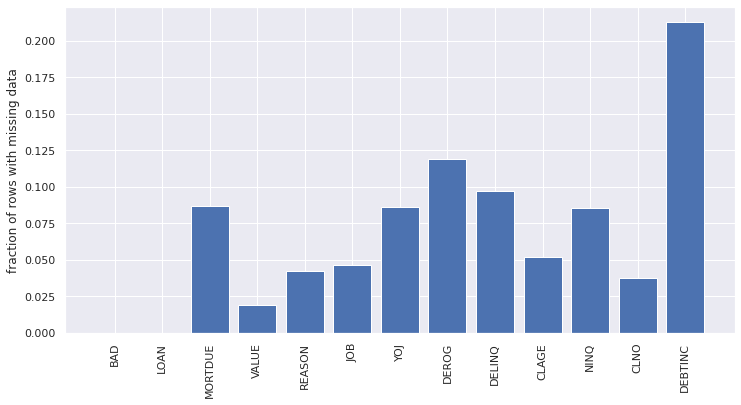

In [0]:
null_counts = data.isnull().sum()/len(data)
plt.figure(figsize=(12,6))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [0]:
 
# Eksik değerleri tamamlamak için kullanılacak yöntemler yeni bir sütun olarak ekleniyor :
data_Analysis['Elimination_Method'] = ""
for x in range(len(data_Analysis)) :
  if data_Analysis['Missing_Value(%)'][x] == (0.00) :
    data_Analysis['Elimination_Method'][x] = 'NaN'
  elif data_Analysis['Missing_Value(%)'][x] <= (0.05) :
    data_Analysis['Elimination_Method'][x] = 'Simple'  
  elif data_Analysis['Missing_Value(%)'][x] < (0.25) :
    data_Analysis['Elimination_Method'][x] = 'Tree-Based'
  elif df_Analysis['Missing_Value(%)'][x] < (0.5) :
    data_Analysis['Elimination_Method'][x] = 'Model' 

data_Analysis

In [0]:
data_Analysis.set_index('Variable_Name', inplace = True) # kolonların hangi modelde olduğu
data_Analysis
# Index olarak Variable_Name atandı.

In [0]:
len(data.index) == data.shape[0] # Tekrar eden satır olup olmadığı sorgulandı.

True

# Değişkenlerin Sayısal ve Kategorik Olarak Ayrılması

In [0]:
# Sayısal ve kategorik değişkenler ayrı ayrı listelerde toplanıyor.
numerical_columns = list(data_Analysis.loc[(data_Analysis.loc[:,"Variable_Type"] == "Cardinal") | (data_Analysis.loc[:,"Variable_Type"] == "Continuous")].index)
len(numerical_columns), numerical_columns

(10,
 ['DEBTINC',
  'DEROG',
  'DELINQ',
  'MORTDUE',
  'YOJ',
  'NINQ',
  'CLAGE',
  'CLNO',
  'VALUE',
  'LOAN'])

In [0]:
categorical_columns = list(data_Analysis.loc[(data_Analysis.loc[:,"Variable_Type"] == 'Ordinal') | (data_Analysis.loc[:,"Variable_Type"] == 'Nominal')].index)
len(categorical_columns), categorical_columns

(3, ['JOB', 'REASON', 'BAD'])

In [0]:
len(numerical_columns)+len(categorical_columns) == len(data.columns)

True

# Sayısal Değişkenlerin Grafikleri

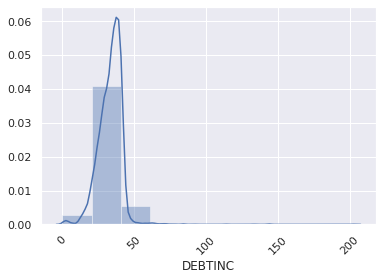

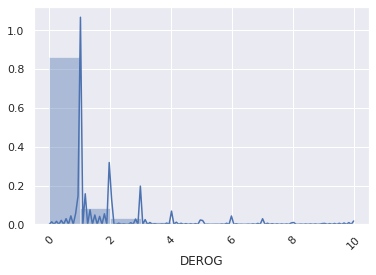

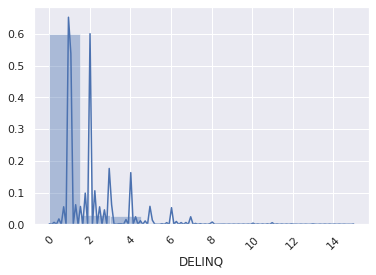

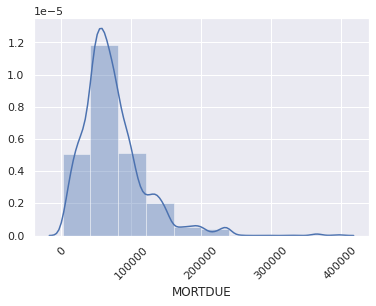

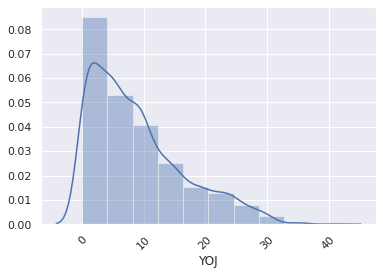

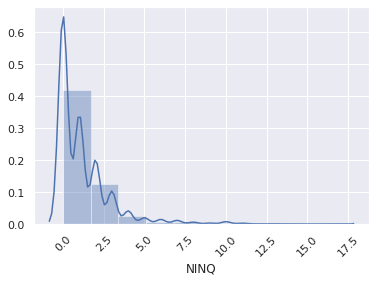

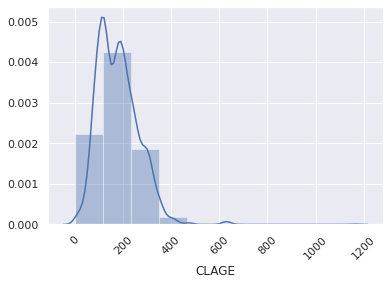

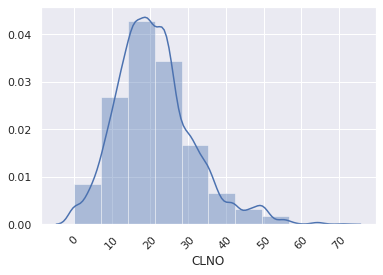

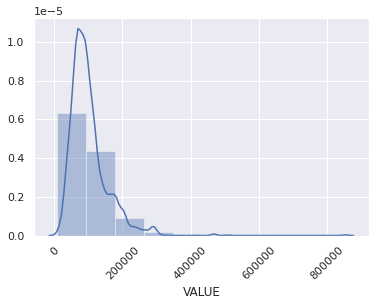

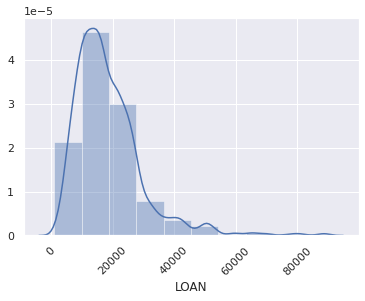

In [0]:
# Sayısal değer içeren sütunların görsel incelemesi yapılıyor.
for col in numerical_columns:
    plt.figure()
    x=data[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation = 45)
    plt.show()

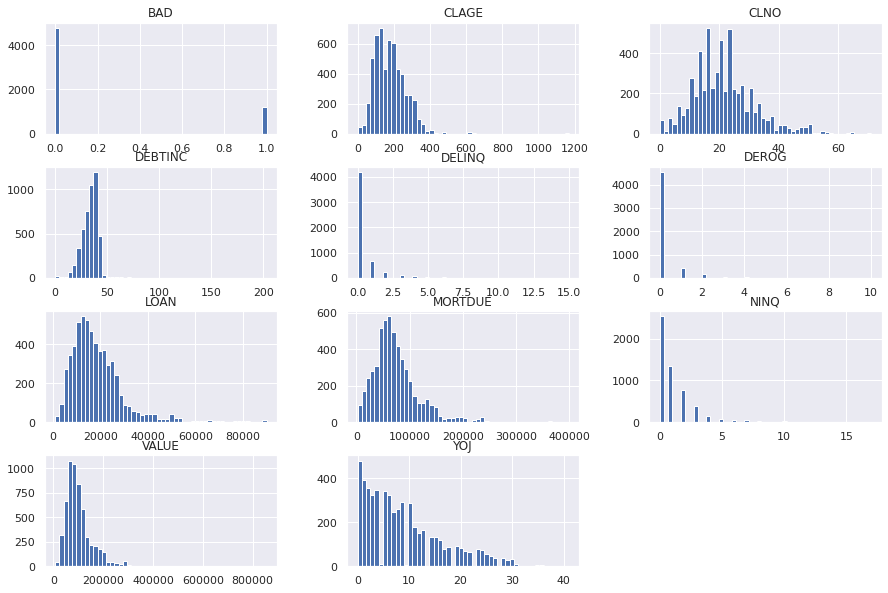

In [0]:
data.hist(bins=50, figsize=(15,10));

# 0 Varyansa Sahip Kolonlar
Varyansı 0 olan öznitelik olup olmadığını tarayan bir fonksiyon oluşturuluyor.

In [0]:
# Varyansı 0 olan öznitelik olup olmadığını tarayan bir fonksiyon oluşturuluyor.
def ZeroVarianceFinder(df, numerical_columns):
  
  import pandas as pd
  import numpy as np

  zerovariance_numerical_features=[]
  for col in numerical_columns:
      try:
          if pd.DataFrame(df[col]).describe().loc['std'][0] == 0.00 or \
          np.isnan(pd.DataFrame(df[col]).describe().loc['std'][0]):
              zerovariance_numerical_features.append(col)
      except:
          print("Error:",col)
  return zerovariance_numerical_features

In [0]:
ZeroVarianceFinder(data, numerical_columns)

[]

# Kategorikler için . . . 

In [0]:
# Üstteki fonksiyonla aynı amacı güden fakat bu kez kategorik değişkenleri için bir fonksiyon daha yazılıyor.
singleton_categorics = []
for col in categorical_columns :
   if len(data[col].unique()) <=1:
    singleton_categorics.append(col)
len(singleton_categorics),singleton_categorics

(0, [])

# Verinin Eğitim ve Test Olarak Ayrılması

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Veri eğitim ve test olarak ayrılıyor.
X=data.iloc[:,1:]
y=data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4172, 12) (1788, 12) (4172,) (1788,)


# Ortalama Çarpıklık ve Basıklık

In [0]:
# Aykırı temizlikten sonra değişiklikleri görebilmek için verinin 'ortalama çarpıklığı ve basıklığı' hesaplanıyor .

# Önce train için ...
from scipy.stats import kurtosis, skew

dic_skewness_train={}
dic_kurtosis_train={}

for col in numerical_columns :
    dic_skewness_train[col] = float(skew(X_train[col],nan_policy='omit'))

for col in numerical_columns :
    dic_kurtosis_train[col] = float(kurtosis(X_train[col],nan_policy='omit'))

sum_skewness_train = sum(dic_skewness_train.values())
sum_kurtosis_train = sum(dic_kurtosis_train.values())
average_skewness_train = sum_skewness_train / len(dic_skewness_train)
average_kurtosis_train = sum_kurtosis_train / len(dic_kurtosis_train)

average_skewness_train, average_kurtosis_train

(2.2578646875589996, 12.571313798635751)

In [0]:
# Şimdi test için

dic_skewness_test={}
dic_kurtosis_test={}

for col in numerical_columns :
  dic_skewness_test[col] = float(skew(X_test[col],nan_policy='omit'))

for col in numerical_columns :
  dic_kurtosis_test[col] = float(kurtosis(X_test[col],nan_policy='omit'))

sum_skewness_test = sum(dic_skewness_test.values())
sum_kurtosis_test = sum(dic_kurtosis_test.values())
average_skewness_test = sum_skewness_test / len(dic_skewness_test)
average_kurtosis_test = sum_kurtosis_test / len(dic_kurtosis_test)

average_skewness_test, average_kurtosis_test

(2.7263699238375247, 20.438796996627943)

# Sparse Kolonların Bulunması
Büyük çoğunluğu tek bir değerden oluşan bir kolon varsa; onu bulacak fonksiyon yazılıyor. 

In [0]:
copy_data = X_train.copy()
if 'left_skewed_columns' not in globals() :
  left_skewed_columns = []
  for col in numerical_columns :
    if copy_data.loc[copy_data[col]!=copy_data[col].mode()[0],col].median() < -1 :
      left_skewed_columns.append(col)
else :
  print("'left_skewed_columns' are already identified!")
epsilon = 0.0001

for col in left_skewed_columns :
  if copy_data.loc[copy_data[col]!=copy_data[col].mode()[0],col].median() < -1 :
    copy_data.loc[:,col] *= -1
  else :
    continue

sparse_columns = []

for col in numerical_columns :
  if (copy_data[col].quantile(0.01)==copy_data[col].quantile(0.25)==copy_data[col].mode()[0]):
    sparse_columns.append(col) # %1. değer, %25.değer ve mod değerine eşitse oluşturulan sparse_columns listesine eklendi.

sparse_columns_2 = []

for col in numerical_columns :
  if (copy_data[col].quantile(0.01)==copy_data[col].quantile(0.25)) :
    sparse_columns_2.append(col) # Bir önceki listeden farkı burada %1. değer %25. değere eşit olsa da %1. değerin mod değerine eşit olması gerekmiyor.

len(numerical_columns), len(sparse_columns), len(sparse_columns_2) # Sayısal özniteliklerin hangileri sparse ona gördük.

(10, 3, 3)

In [0]:
if sparse_columns == sparse_columns_2 :
   print(sparse_columns)
else : kadar
  print(sparse_columns, sparse_columns_2)

['DEROG', 'DELINQ', 'NINQ']


# Outlier Temizliğine Başlamadan Önceki Karşılaştırma Grafikleri

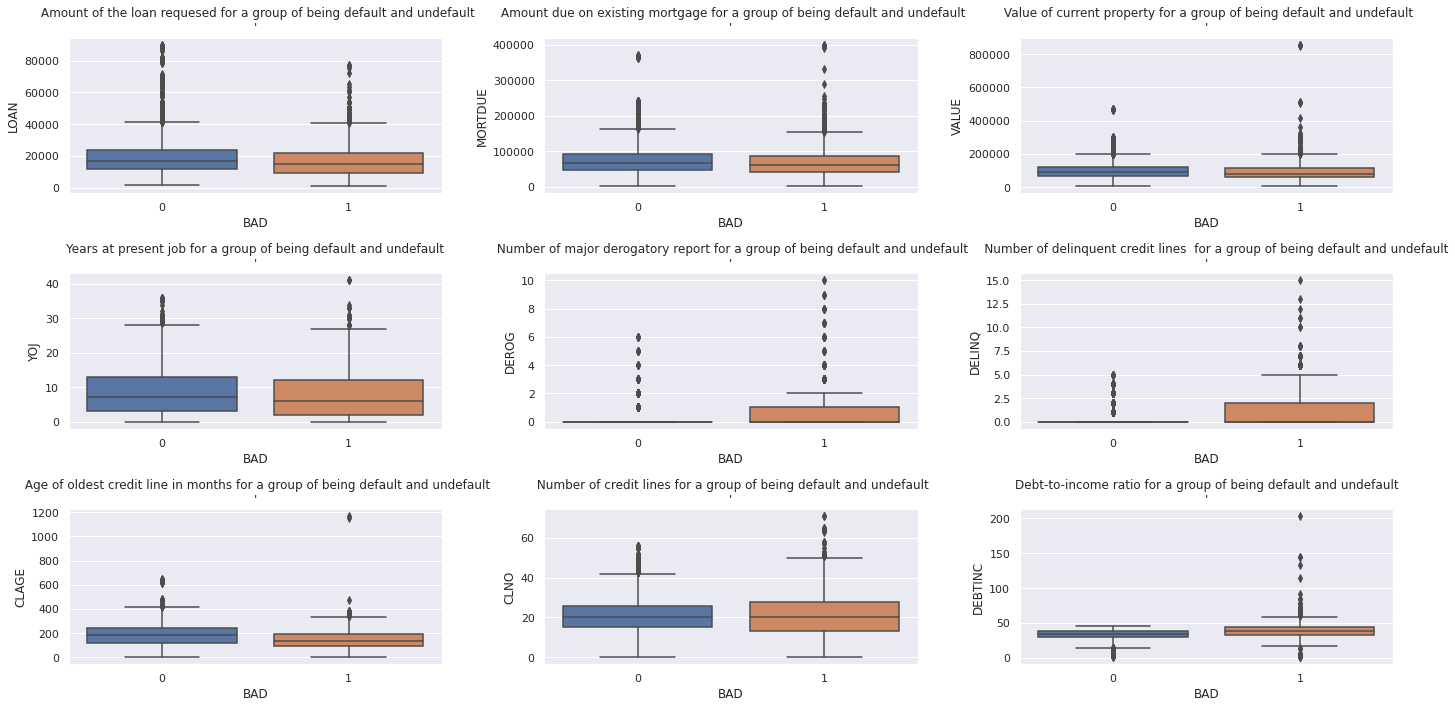

In [0]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
fig, axs = plt.subplots(3,3)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
sns.boxplot(x="BAD", y="LOAN", data=data,ax=axs[0,0])
axs[0,0].set_title(" Amount of the loan requesed for a group of being default and undefault\n'",fontsize=12)
sns.boxplot(x="BAD", y="MORTDUE", data=data,ax=axs[0,1])
axs[0,1].set_title(" Amount due on existing mortgage for a group of being default and undefault\n'",fontsize=12)
sns.boxplot(x="BAD", y="VALUE", data=data,ax=axs[0,2])
axs[0,2].set_title(" Value of current property for a group of being default and undefault\n'",fontsize=12)

sns.boxplot(x="BAD", y="YOJ", data=data,ax=axs[1,0])
axs[1,0].set_title("Years at present job for a group of being default and undefault\n'",fontsize=12)

sns.boxplot(x="BAD", y="DEROG", data=data,ax=axs[1,1])
axs[1,1].set_title(" Number of major derogatory report for a group of being default and undefault\n'",fontsize=12)

sns.boxplot(x="BAD", y="DELINQ", data=data,ax=axs[1,2])
axs[1,2].set_title("     Number of delinquent credit lines  for a group of being default and undefault\n'",fontsize=12)

sns.boxplot(x="BAD", y="CLAGE", data=data,ax=axs[2,0])
axs[2,0].set_title(" Age of oldest credit line in months for a group of being default and undefault\n'",fontsize=12)


sns.boxplot(x="BAD", y="CLNO", data=data,ax=axs[2,1])
axs[2,1].set_title(" Number of credit lines for a group of being default and undefault\n'",fontsize=12)


sns.boxplot(x="BAD", y="DEBTINC", data=data,ax=axs[2,2])
axs[2,2].set_title("Debt-to-income ratio for a group of being default and undefault\n'",fontsize=12)

plt.tight_layout()
plt.show()

# Hard Edge Reduction
Bu yöntemle kolonların değerleri sıralandıktan sonra %1 ve %99. değerler arasına sıkıştırılıyor.

In [0]:
def HardEdgeReduction(df,numerical_columns,sparse_columns,upper_quantile=0.99,lower_quantile=0.01):
    
    import pandas as pd

    import psutil, os, gc, time
    print("HardEdgeReduction process has began :\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()
    
    # Do outlier cleaning in only one loop
    epsilon = 0.0001 # for zero divisions

   
    data_outlier_cleaned = df.copy()

    print("Detected outliers will be replaced with edged quantiles/percentiles: %1 and %99 !\n")
    print("Total number of rows : %s\n"%data_outlier_cleaned.shape[0])

    outlier_boundries_dict={}

    for col in numerical_columns:

        if col in sparse_columns:

            # Önce sparse verilerden kurtulalım :
            nonsparse_data = pd.DataFrame(data_outlier_cleaned[data_outlier_cleaned[col] !=\
                                                             data_outlier_cleaned[col].mode()[0]][col]) 
            
            # Sparse verileri çekmek için modu kullandık, çünkü bunun yeterli olduğunu biliyoruz.

            # Aykırı değer için sınırları bulalım :
            
            # Alt sınır için ;
            if nonsparse_data[col].quantile(lower_quantile) < data_outlier_cleaned[col].mode()[0]: 
                lower_bound_sparse = nonsparse_data[col].quantile(lower_quantile)
            else:
                lower_bound_sparse = data_outlier_cleaned[col].mode()[0]
            
            # Üst sınır için ;
            if nonsparse_data[col].quantile(upper_quantile) < data_outlier_cleaned[col].mode()[0]: 
                upper_bound_sparse = df_outlier_cleaned[col].mode()[0]
            else:
                upper_bound_sparse = nonsparse_data[col].quantile(upper_quantile)

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)

            # Aykırı değer sayısı hakkında kullanıcı bilgilendiriliyor :
            number_of_outliers = len(data_outlier_cleaned[(data_outlier_cleaned[col] < lower_bound_sparse) |\
                                                        (data_outlier_cleaned[col] > upper_bound_sparse)][col])
            print("Sparse: Outlier number in %s is equal to : "%col,number_of_outliers/(nonsparse_data.shape[0] -
                                                                                       nonsparse_data.isnull().sum()))

            # Aykırı değerler, belirtilen kartillere atanıyor --> %1 ve %99:
            if number_of_outliers > 0:

                # Alt sınırın altındaki aykırı değerler %1. kartil değerine eşitleniyor.
                data_outlier_cleaned.loc[data_outlier_cleaned[col] < lower_bound_sparse,col] = lower_bound_sparse - epsilon # VERİMİZ DEĞİŞTİ !

                # Üst sınırın üstündeki aykırı değerler %99. kartil değerine eşitleniyor.
                data_outlier_cleaned.loc[data_outlier_cleaned[col] > upper_bound_sparse,col] = upper_bound_sparse + epsilon # VERİMİZ DEĞİŞTİ !

        else:
            # Sınırlar bulunuyor :
            number_of_outliers = len(data_outlier_cleaned[(data_outlier_cleaned[col] < \
                                                         data_outlier_cleaned[col].quantile(lower_quantile))|\
                                                        (data_outlier_cleaned[col] > \
                                                         data_outlier_cleaned[col].quantile(upper_quantile))]\
                                     [col])
            result = number_of_outliers/(df[col].shape[0] - df[col].isnull().sum())
            print("Other: Outlier number in {} is equal to : ".format(col),round(result,4)) 

            # 'Standart' aykırı değerler değiştiriliyor :
            if number_of_outliers > 0:
                
                lower_bound_sparse = data_outlier_cleaned[col].quantile(lower_quantile)
                data_outlier_cleaned.loc[data_outlier_cleaned[col] < \
                                       lower_bound_sparse,col] \
                = lower_bound_sparse  - epsilon

                upper_bound_sparse = data_outlier_cleaned[col].quantile(upper_quantile)
                data_outlier_cleaned.loc[data_outlier_cleaned[col] > \
                                       upper_bound_sparse,col] \
                = upper_bound_sparse  + epsilon

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)


    print("HardEdgeReduction has been completed in %s minutes !" % ((time.time() - start_time)/60))

    return data_outlier_cleaned, outlier_boundries_dict

In [0]:
X_train_outlier_cleaned, outlier_boundries_dict = HardEdgeReduction(X_train,numerical_columns,sparse_columns) # X_train'in aykırı değerleri temizlendi.

HardEdgeReduction process has began :

Detected outliers will be replaced with edged quantiles/percentiles: %1 and %99 !

Total number of rows : 4172

Other: Outlier number in DEBTINC is equal to :  0.0206
Sparse: Outlier number in DEROG is equal to :  DEROG    0.003899
dtype: float64
Sparse: Outlier number in DELINQ is equal to :  DELINQ    0.006242
dtype: float64
Other: Outlier number in MORTDUE is equal to :  0.0204
Other: Outlier number in YOJ is equal to :  0.0055
Sparse: Outlier number in NINQ is equal to :  NINQ    0.005906
dtype: float64
Other: Outlier number in CLAGE is equal to :  0.0202
Other: Outlier number in CLNO is equal to :  0.0082
Other: Outlier number in VALUE is equal to :  0.0205
Other: Outlier number in LOAN is equal to :  0.0199
HardEdgeReduction has been completed in 0.0015895446141560873 minutes !


In [0]:
outlier_boundries_dict

{'CLAGE': (30.859727808099997, 402.31559541749994),
 'CLNO': (0.0, 51.0),
 'DEBTINC': (13.34972399776, 48.06804201800001),
 'DELINQ': (0.0, 7.0),
 'DEROG': (0.0, 8.0),
 'LOAN': (3300.0, 59857.99999999999),
 'MORTDUE': (7886.26, 234238.03999999998),
 'NINQ': (0.0, 10.0),
 'VALUE': (26500.210000000003, 289999.73),
 'YOJ': (0.0, 30.0)}

In [0]:
X_train_outlier_cleaned.describe(), X_train.describe()

(               LOAN        MORTDUE  ...         CLNO      DEBTINC
 count   4172.000000    3818.000000  ...  4028.000000  3305.000000
 mean   18535.651007   73549.940390  ...    21.247518    33.585776
 std    10402.481386   42697.625873  ...     9.950516     6.979850
 min     3299.999900    7886.259900  ...     0.000000    13.349624
 25%    11300.000000   46385.000000  ...    15.000000    29.188980
 50%    16400.000000   65106.500000  ...    20.000000    34.760575
 75%    23300.000000   91488.000000  ...    26.000000    38.972487
 max    59858.000100  234238.040100  ...    51.000100    48.068142
 
 [8 rows x 10 columns],
                LOAN        MORTDUE  ...         CLNO      DEBTINC
 count   4172.000000    3818.000000  ...  4028.000000  3305.000000
 mean   18661.792905   73971.637169  ...    21.299404    33.691051
 std    11056.280141   44982.728677  ...    10.129763     8.008384
 min     1100.000000    2063.000000  ...     0.000000     0.524499
 25%    11300.000000   46385.000000 

# Outlier Temizliğinden Sonra Ortalama Çarpıklık ve Basıklık

In [0]:
from scipy.stats import kurtosis, skew

dic_skewness_train_oc={}
dic_kurtosis_train_oc={}

for col in numerical_columns :
    dic_skewness_train_oc[col] = float(skew(X_train_outlier_cleaned[col],nan_policy='omit'))

for col in numerical_columns :
    dic_kurtosis_train_oc[col] = float(kurtosis(X_train_outlier_cleaned[col],nan_policy='omit'))

sum_skewness_train_oc = sum(dic_skewness_train_oc.values())
sum_kurtosis_train_oc = sum(dic_kurtosis_train_oc.values())
average_skewness_train_oc = sum_skewness_train_oc / len(dic_skewness_train_oc)
average_kurtosis_train_oc = sum_kurtosis_train_oc / len(dic_kurtosis_train_oc)

average_skewness_train_oc, average_kurtosis_train_oc

(1.639271694609448, 5.918750479083694)

# Outlier Temizliğinden Sonraki Karşılaştırma Grafikleri

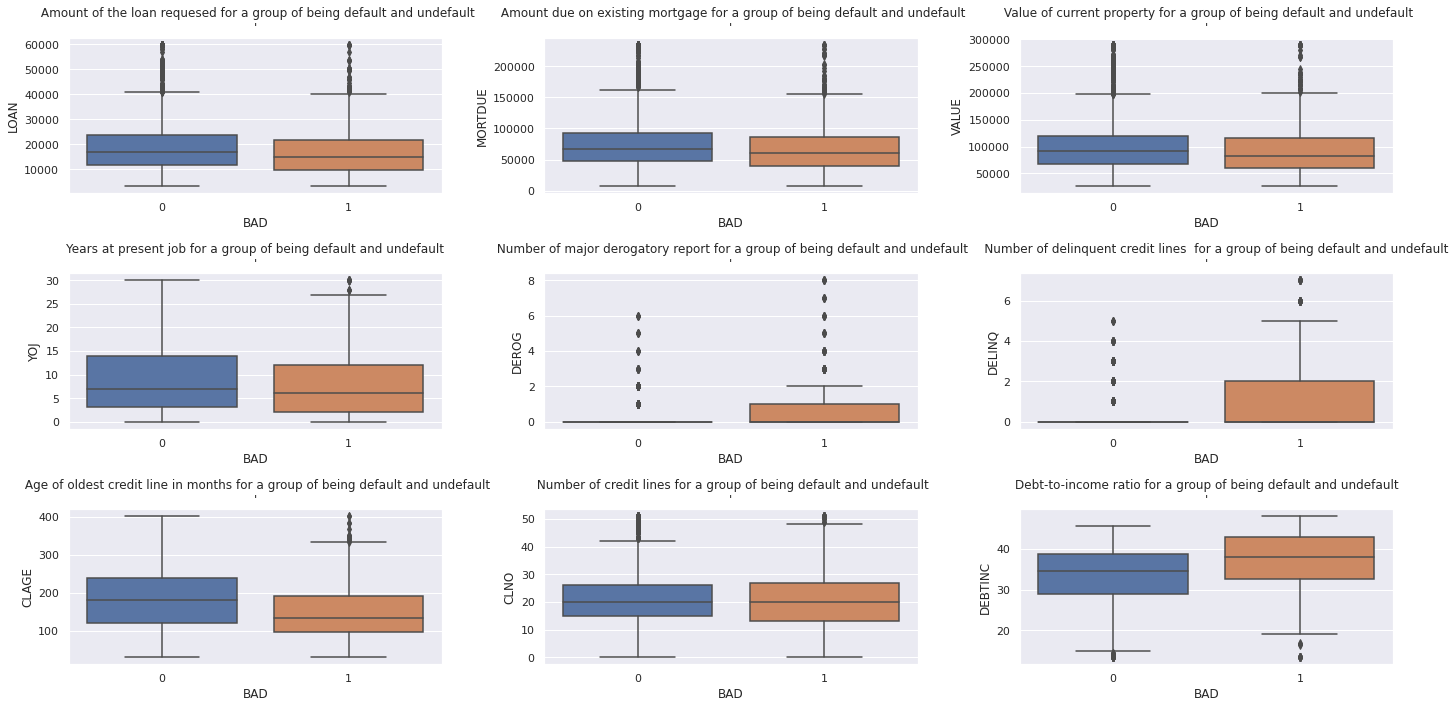

In [0]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
fig, axs = plt.subplots(3,3)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
concat_cleaned = pd.concat([X_train_outlier_cleaned, y_train], axis = 1)
sns.boxplot(x="BAD", y="LOAN", data=concat_cleaned,ax=axs[0,0])
axs[0,0].set_title(" Amount of the loan requesed for a group of being default and undefault\n'",fontsize=12)
sns.boxplot(x="BAD", y="MORTDUE", data=concat_cleaned,ax=axs[0,1])
axs[0,1].set_title(" Amount due on existing mortgage for a group of being default and undefault\n'",fontsize=12)
sns.boxplot(x="BAD", y="VALUE", data=concat_cleaned,ax=axs[0,2])
axs[0,2].set_title(" Value of current property for a group of being default and undefault\n'",fontsize=12)

sns.boxplot(x="BAD", y="YOJ", data=concat_cleaned,ax=axs[1,0])
axs[1,0].set_title("Years at present job for a group of being default and undefault\n'",fontsize=12)

sns.boxplot(x="BAD", y="DEROG", data=concat_cleaned,ax=axs[1,1])
axs[1,1].set_title(" Number of major derogatory report for a group of being default and undefault\n'",fontsize=12)

sns.boxplot(x="BAD", y="DELINQ", data=concat_cleaned,ax=axs[1,2])
axs[1,2].set_title("     Number of delinquent credit lines  for a group of being default and undefault\n'",fontsize=12)

sns.boxplot(x="BAD", y="CLAGE", data=concat_cleaned,ax=axs[2,0])
axs[2,0].set_title(" Age of oldest credit line in months for a group of being default and undefault\n'",fontsize=12)


sns.boxplot(x="BAD", y="CLNO", data=concat_cleaned,ax=axs[2,1])
axs[2,1].set_title(" Number of credit lines for a group of being default and undefault\n'",fontsize=12)


sns.boxplot(x="BAD", y="DEBTINC", data=concat_cleaned,ax=axs[2,2])
axs[2,2].set_title("Debt-to-income ratio for a group of being default and undefault\n'",fontsize=12)

plt.tight_layout()
plt.show()

# Test veri seti için outlier temizliği yapılıyor .

In [0]:
# Test verisi üzerinde aykırı değer temizliğine başlanıyor.

epsilon = 0.0001 # for zero divisions

# Sınırlar tanımlanıyor.
upper_quantile = 0.99
lower_quantile = 0.01

data_test_outlier_cleaned = X_test.copy()

print("Detected outliers will be replaced with edged quantiles/percentiles: %1 and %99\n")
print("Total number of rows : %s\n"%data_test_outlier_cleaned.shape[0])

for col in numerical_columns:

      lower_bound = outlier_boundries_dict[col][0]
      upper_bound = outlier_boundries_dict[col][1]
        
      # Aykırı değer sayısı hakkında kullanıcı bilgilendiriliyor :
      number_of_outliers = len(data_test_outlier_cleaned[(data_test_outlier_cleaned[col] < lower_bound) |\
                                                        (data_test_outlier_cleaned[col] > upper_bound)][col])
      print("Sparse: Outlier number in %s is equal to: "%col, number_of_outliers/
            (data_test_outlier_cleaned[col].shape[0] - data_test_outlier_cleaned[col].isnull().sum()))

      # Aykırı değerler, belirtilen kartillere atanıyor --> %1 ve %99:
      if number_of_outliers > 0:

          # Alt sınırın altındaki aykırı değerler %1. kartil değerine eşitleniyor.
          data_test_outlier_cleaned.loc[data_test_outlier_cleaned[col] < lower_bound,col] = lower_bound  - epsilon # --> VERİ DEĞİŞTİ !
          
          # Üst sınırın üstündeki aykırı değerler %99. kartil değerine eşitleniyor.
          data_test_outlier_cleaned.loc[data_test_outlier_cleaned[col] > upper_bound,col] = upper_bound  + epsilon # --> VERİ DEĞİŞTİ ! 

Detected outliers will be replaced with edged quantiles/percentiles: %1 and %99

Total number of rows : 1788

Sparse: Outlier number in DEBTINC is equal to:  0.02521613832853026
Sparse: Outlier number in DEROG is equal to:  0.0019120458891013384
Sparse: Outlier number in DELINQ is equal to:  0.004361370716510903
Sparse: Outlier number in MORTDUE is equal to:  0.014778325123152709
Sparse: Outlier number in YOJ is equal to:  0.005593536357986327
Sparse: Outlier number in NINQ is equal to:  0.0024630541871921183
Sparse: Outlier number in CLAGE is equal to:  0.019572953736654804
Sparse: Outlier number in CLNO is equal to:  0.005263157894736842
Sparse: Outlier number in VALUE is equal to:  0.020642201834862386
Sparse: Outlier number in LOAN is equal to:  0.02181208053691275


In [0]:
X_test_outlier_cleaned = data_test_outlier_cleaned
X_test_outlier_cleaned # X_test'in aykırı değerleri temizlendi.

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
INDEX,,,,,,,,,,,,
1345,10600.0000,44696.0,57686.0,DebtCon,Office,0.0,0.0,0.0,170.340974,0.0,20.0,37.792555
626,7800.0000,38506.0,50309.0,DebtCon,Other,11.0,0.0,0.0,231.001195,0.0,32.0,35.906116
5909,59858.0001,67389.0,142740.0,HomeImp,Office,9.0,0.0,1.0,116.906104,0.0,11.0,43.368718
2992,16400.0000,63574.0,88586.0,HomeImp,Other,NaN,0.0,0.0,298.146552,0.0,20.0,29.153372
1546,11300.0000,NaN,28600.0,HomeImp,Office,20.0,0.0,0.0,190.031218,0.0,15.0,39.008673
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,13800.0000,NaN,44459.0,HomeImp,Mgr,4.0,NaN,NaN,169.005410,NaN,9.0,21.532897
5747,43300.0000,NaN,45924.0,DebtCon,Other,NaN,1.0,1.0,207.300730,0.0,17.0,33.678946
4457,23200.0000,112948.0,159050.0,DebtCon,Mgr,16.0,0.0,0.0,189.839009,0.0,25.0,33.493966


# Test verisi için ortalama çarpıklık ve basıklık hesaplanıyor .

In [0]:
# Şimdi test için

dic_skewness_test_oc={}
dic_kurtosis_test_oc={}

for col in numerical_columns :
  dic_skewness_test_oc[col] = float(skew(X_test_outlier_cleaned[col],nan_policy='omit'))

for col in numerical_columns :
  dic_kurtosis_test_oc[col] = float(kurtosis(X_test_outlier_cleaned[col],nan_policy='omit'))

sum_skewness_test_oc = sum(dic_skewness_test_oc.values())
sum_kurtosis_test_oc = sum(dic_kurtosis_test_oc.values())
average_skewness_test_oc = sum_skewness_test_oc / len(dic_skewness_test_oc)
average_kurtosis_test_oc = sum_kurtosis_test_oc / len(dic_kurtosis_test_oc)

average_skewness_test_oc, average_kurtosis_test_oc

(1.6443954552859932, 6.349215754380117)

# Hem eğitim hem test verisinde, ortalama çarpıklık ve basıklık azaldı .

In [0]:
X_test_outlier_cleaned.describe(), X_test.describe()

(               LOAN        MORTDUE  ...         CLNO      DEBTINC
 count   1788.000000    1624.000000  ...  1710.000000  1388.000000
 mean   18304.684564   73003.955781  ...    21.246199    33.695321
 std    10684.463379   41658.009497  ...    10.013841     7.189147
 min     3299.999900    7886.259900  ...     0.000000    13.349624
 25%    10700.000000   46032.250000  ...    14.000000    29.040334
 50%    16000.000000   64891.000000  ...    20.000000    34.983333
 75%    23325.000000   91460.750000  ...    27.000000    39.111317
 max    59858.000100  234238.040100  ...    51.000100    48.068142
 
 [8 rows x 10 columns],
                LOAN        MORTDUE  ...         CLNO      DEBTINC
 count   1788.000000    1624.000000  ...  1710.000000  1388.000000
 mean   18482.382550   73265.182568  ...    21.288304    33.991512
 std    11554.762801   43207.511271  ...    10.163464     9.872057
 min     2000.000000    3372.000000  ...     0.000000     0.720295
 25%    10700.000000   46032.250000 

# Değişkenler eksik değer oranına göre gruplanıyor .

In [0]:
# Kullanılacak eksik veri doldurma yöntemine göre öznitelikler ayrı ayrı listelerde toplanıyor.

Zero_MR_variables_list = list(data_Analysis[data_Analysis['Missing_Value(%)']==0].index)
Low_MR_variables_list = list(data_Analysis[(data_Analysis['Missing_Value(%)']>0)&
                                       (data_Analysis['Missing_Value(%)']<=0.05)].index)
Moderate_MR_variables_list = list(data_Analysis[(data_Analysis['Missing_Value(%)']>0.05)&\
                                                      (data_Analysis['Missing_Value(%)']<=0.25)].index)
High_MR_variables_list = list(data_Analysis[(data_Analysis['Missing_Value(%)']>0.25)&\
                                                  (data_Analysis['Missing_Value(%)']<=0.50)].index)
Extreme_MR_variables_list = list(data_Analysis[(data_Analysis['Missing_Value(%)']>0.50)&
                                           (data_Analysis['Missing_Value(%)']<=0.95)].index)
Drop_MR_variables_list = list(data_Analysis[data_Analysis['Missing_Value(%)']>0.95].index)

len(Zero_MR_variables_list),len(Low_MR_variables_list),len(Moderate_MR_variables_list),len(High_MR_variables_list),\
len(Extreme_MR_variables_list),\
len(Zero_MR_variables_list)+len(Low_MR_variables_list)+len(Moderate_MR_variables_list)+len(High_MR_variables_list)+\
len(Extreme_MR_variables_list) == len(data_Analysis)

(2, 4, 7, 0, 0, True)

# Imputation yapılacak değişkenler bir listede toplanıyor .

In [0]:
# Simple imputation yapılacak kategorik değişkenler bir listede toplanıyor.
lst = Low_MR_variables_list+Moderate_MR_variables_list
lst

['JOB',
 'REASON',
 'CLNO',
 'VALUE',
 'DEBTINC',
 'DEROG',
 'DELINQ',
 'MORTDUE',
 'YOJ',
 'NINQ',
 'CLAGE']

In [0]:
SimpleDataAnalysis(X_train_outlier_cleaned)

Simple data analysis has began :

Simple data analysis has been completed in 0.0006851593653361003 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
11,DEBTINC,3305,867,0.2078,float,"[nan, 39.173553951, 16.727748096, 40.442567785...",3240
6,DEROG,3683,489,0.1172,float,"[0.0, 2.0, 1.0, nan, 3.0, 6.0, 5.0, 8.0, 4.0, ...",11
7,DELINQ,3775,397,0.0952,float,"[1.0, 0.0, 2.0, nan, 5.0, 3.0, 6.0, 4.0, 7.000...",10
1,MORTDUE,3818,354,0.0849,float,"[52720.0, 97373.0, 23517.0, 71644.0, 54000.0, ...",3520
9,NINQ,3826,346,0.0829,float,"[0.0, 4.0, 10.0, 1.0, 3.0, 2.0, nan, 7.0, 5.0,...",13
5,YOJ,3836,336,0.0805,float,"[nan, 10.0, 0.0, 4.0, 7.5, 19.0, 3.0, 15.0, 2....",81
8,CLAGE,3966,206,0.0494,float,"[126.11651831, 139.13259829, 78.813600281, 150...",3722
4,JOB,3976,196,0.0470,object,"[Other, Office, Sales, Mgr, ProfExe, nan, Self]",7
3,REASON,4008,164,0.0393,object,"[DebtCon, HomeImp, nan]",3
10,CLNO,4028,144,0.0345,float,"[21.0, 28.0, 7.0, 22.0, 18.0, 24.0, 19.0, 51.0...",54


# Veri Setinin Kopyasının Alınması 
Ana veri setinde değişiklik olmaması için; üzerinde işlem yapılmak üzere kopyalar oluşturuluyor.

In [0]:
Xgboost_X_train = X_train_outlier_cleaned.copy()
Xgboost_X_test  = X_test_outlier_cleaned.copy()

In [0]:
X3_train_outlier_cleaned = X_train_outlier_cleaned.copy()
X3_test_outlier_cleaned = X_test_outlier_cleaned.copy()

In [0]:
KNN_X_train = X_train_outlier_cleaned.copy()
KNN_X_test = X_test_outlier_cleaned.copy()

# Simple Imputation


In [0]:
def Simple_Imputation(egitim, test, islem_uygulanacak_kolonlar, sayisal_kolonlar, kategorik_kolonlar) :
  for kol in islem_uygulanacak_kolonlar :
    
    # İlk önce eksik değerlerin sayısına bakılıyor . (Çıktı da rapor verirken kullanılacak bu sayılar.)
    
    egitimde_NaN_sayisi = int(egitim[[kol]].isnull().sum())
    testte_NaN_sayisi = int(test[[kol]].isnull().sum())
    
    if kol in sayisal_kolonlar :

    # Sayısal kolonlar için, eksik değerler (ortalama-standartsapma, ortalama+1standartsapma) aralığına rastgele atılacak .  

      ortalama = float(egitim[[kol]].mean()) 
      standart_sapma = float(egitim[[kol]].std()) # Sadece eğitim verisi üzerinde hesaplama yapılıyor, çünkü test verisindeki girdiler eğitim verisine benzetilmeye çalışılır .

      atama = np.random.normal(loc = ortalama, scale = 1*standart_sapma, size = egitimde_NaN_sayisi + testte_NaN_sayisi) # (ortalama-1.5*standartsapma,ortalama+1.5*standartsapma) aralığında rastgele değerler içeren, boyutu egitimdeki ve testteki eksik değer sayılarının toplamına eşit olan bir dizi oluşturuldu .

      egitimden_kolon = egitim[kol].copy() 
      egitimden_kolon = pd.Series(egitimden_kolon) # Seçilen kolon seriye çevrildi .
      egitimden_kolon[pd.isnull(egitimden_kolon)] = atama[:egitimde_NaN_sayisi] # Serideki eksik değerler oluşturulan dizinin ilk n değeriyle eşleştirildi (n = eğitimdeki eksik değer sayısı).
      egitim[kol] = egitimden_kolon # Alınan kopya asıl verinin içine yerleştirildi.

    # Şimdi de aynı işlemler test verisi için yapılacak.

      testten_kolon = test[kol].copy()
      testten_kolon = pd.Series(testten_kolon)
      testten_kolon[pd.isnull(testten_kolon)] = atama[egitimde_NaN_sayisi:] # Tek fark burası ! Bu sefer n'den sonraki değerler eksik değerlerle eşleştirildi .
      test[kol] = testten_kolon

      print("For train data : {} percent of observation in numerical variable {} have been imputed !\n".format(egitimde_NaN_sayisi/egitim.shape[0],kol))
      
      print("For test data : {} percent of observation in numerical variable {} have been imputed !\n".format(testte_NaN_sayisi/test.shape[0],kol))


    # Sayısal kolonlar için eksik değerler dolduruldu !

    elif kol in kategorik_kolonlar : 
    
    # Kategorik kolonlar için, eksik değerler özniteliğin aldığı değerlere rastgele atanacak .

      egitim.loc[egitim.loc[:,kol].isnull(),kol] = np.random.choice(sorted(list(egitim.loc[:,kol].dropna().unique())), size = int(egitim.loc[egitim.loc[:,kol].isnull(),kol].shape[0]), p = [pd.Series(egitim.groupby(kol).size()/egitim.loc[:,kol].dropna().shape[0]).iloc[i] for i in np.arange(0,len(egitim.loc[:,kol].dropna().unique()))])

    # Aynı işlem test için yapılıyor .
      
      test.loc[test.loc[:,kol].isnull(),kol] = np.random.choice(sorted(list(egitim.loc[:,kol].dropna().unique())), size = int(test.loc[test.loc[:,kol].isnull(),kol].shape[0]), p = [pd.Series(egitim.groupby(kol).size()/egitim.loc[:,kol].dropna().shape[0]).iloc[i] for i in np.arange(0,len(egitim.loc[:,kol].dropna().unique()))])

      print("For train data : {} percent of observation in categorical variable {} have been imputed !\n ".format(egitimde_NaN_sayisi/egitim.shape[0],kol))
      
      print("For test data : {} percent of observation in categorical variable {} have been imputed !\n ".format(testte_NaN_sayisi/test.shape[0],kol))


  print("Number of null values in train data :\n", egitim[islem_uygulanacak_kolonlar].isnull().sum())
  
  print("Number of null values in test data :\n", test[islem_uygulanacak_kolonlar].isnull().sum())

  return egitim, test

In [0]:
simple_X_train, simple_X_test = Simple_Imputation(X3_train_outlier_cleaned,X3_test_outlier_cleaned,lst,numerical_columns,categorical_columns)

For train data : 0.04697986577181208 percent of observation in categorical variable JOB have been imputed !
 
For test data : 0.046420581655480984 percent of observation in categorical variable JOB have been imputed !
 
For train data : 0.039309683604985615 percent of observation in categorical variable REASON have been imputed !
 
For test data : 0.049217002237136466 percent of observation in categorical variable REASON have been imputed !
 
For train data : 0.03451581975071908 percent of observation in numerical variable CLNO have been imputed !

For test data : 0.0436241610738255 percent of observation in numerical variable CLNO have been imputed !

For train data : 0.016299137104506232 percent of observation in numerical variable VALUE have been imputed !

For test data : 0.024608501118568233 percent of observation in numerical variable VALUE have been imputed !

For train data : 0.20781399808245446 percent of observation in numerical variable DEBTINC have been imputed !

For test 

# Encoding
Kategorik değişkenler, sayısala çevriliyor .

In [0]:
#REASON ve JOB ENCODE

from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
_cols = ['JOB','REASON']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in _cols:
    encode(simple_X_train[columns])
    encode(simple_X_test[columns])
    encode(Xgboost_X_test[columns])
    encode(Xgboost_X_train[columns])

Using TensorFlow backend.


In [0]:
SimpleDataAnalysis(simple_X_train)

Simple data analysis has began :

Simple data analysis has been completed in 0.0006888230641682942 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
0,LOAN,4172,0,0.0,float,"[45900.0, 27300.0, 31900.0, 5500.0, 7100.0, 12...",439
1,MORTDUE,4172,0,0.0,float,"[52720.0, 97373.0, 23517.0, 71644.0, 54000.0, ...",3873
2,VALUE,4172,0,0.0,float,"[115224.0, 126102.0, 47805.0, 72696.0, 74800.0...",3815
3,REASON,4172,0,0.0,float,"[0.0, 1.0]",2
4,JOB,4172,0,0.0,float,"[2.0, 1.0, 4.0, 0.0, 3.0, 5.0]",6
5,YOJ,4172,0,0.0,float,"[12.64724632507398, 10.0, 0.0, 4.0, 7.5, 19.0,...",416
6,DEROG,4172,0,0.0,float,"[0.0, 2.0, 1.0, -0.7483668423086265, -0.534205...",499
7,DELINQ,4172,0,0.0,float,"[1.0, 0.0, 2.0, -1.055876233233063, 1.17445591...",406
8,CLAGE,4172,0,0.0,float,"[126.11651831, 139.13259829, 78.813600281, 150...",3927
9,NINQ,4172,0,0.0,float,"[0.0, 4.0, 10.0, 1.0, 3.0, 2.0, 3.563466808851...",358


#Tüm değerler (kategorik ve numerik olanlar) XGBOOST ile dolduruluyor.


In [0]:

from sklearn import base
from sklearn.model_selection import KFold
import numpy as np
import xgboost as xgb

missing_columns =[ 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for feature in (missing_columns):
        
    #deter_data["Det" + feature] = X_train_outlier_cleaned[feature + "_imp"]
    parameters =[ 'LOAN']
    
    #Create a Linear Regression model to estimate the missing data
    #model = linear_model.LinearRegression()
    
    model = xgb.XGBRegressor(objective="reg:squarederror",max_depth=7, min_child_weight=X.shape[0]/50, n_jobs=-1, n_estimators=100, 
                                 random_state=42)
    model.fit(X = Xgboost_X_train[parameters], y = Xgboost_X_train[feature])



   #train
    Xgboost_X_train.loc[Xgboost_X_train[feature].isnull(), feature] = model.predict(Xgboost_X_train[parameters])[Xgboost_X_train[feature].isnull()]
   #test
    Xgboost_X_test.loc[Xgboost_X_test[feature].isnull(), feature] = model.predict(Xgboost_X_test[parameters])[Xgboost_X_test[feature].isnull()]


In [0]:
SimpleDataAnalysis(Xgboost_X_train)

Simple data analysis has began :

Simple data analysis has been completed in 0.0007238984107971191 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
0,LOAN,4172,0,0.0,float,"[45900.0, 27300.0, 31900.0, 5500.0, 7100.0, 12...",439
1,MORTDUE,4172,0,0.0,float,"[52720.0, 97373.0, 23517.0, 71644.0, 54000.0, ...",3520
2,VALUE,4172,0,0.0,float,"[115224.0, 126102.0, 47805.0, 72696.0, 74800.0...",3748
3,REASON,4172,0,0.0,object,"[0.0, 1.0, 0.5]",3
4,JOB,4172,0,0.0,object,"[2.0, 1.0, 4.0, 0.0, 3.0, 0.5, 5.0]",7
5,YOJ,4172,0,0.0,float,"[0.5, 10.0, 0.0, 4.0, 7.5, 19.0, 3.0, 15.0, 2....",80
6,DEROG,4172,0,0.0,float,"[0.0, 2.0, 1.0, 0.5, 3.0, 6.0, 5.0, 8.0, 4.0, ...",11
7,DELINQ,4172,0,0.0,float,"[1.0, 0.0, 2.0, 0.5, 5.0, 3.0, 6.0, 4.0, 7.000...",10
8,CLAGE,4172,0,0.0,float,"[126.11651831, 139.13259829, 78.813600281, 150...",3722
9,NINQ,4172,0,0.0,float,"[0.0, 4.0, 10.0, 1.0, 3.0, 2.0, 0.5, 7.0, 5.0,...",13


# KNN algoritmasıyla eksik veriler dolduruluyor .

In [0]:
for columns in _cols:
    encode(KNN_X_train[columns])
    encode(KNN_X_test[columns])

In [0]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
KNN_X_train = pd.DataFrame(np.round(imputer.fit_transform(KNN_X_train)),columns =KNN_X_train.columns)
KNN_X_test  = pd.DataFrame(np.round(imputer.transform(KNN_X_test)),columns =KNN_X_test.columns)

warnings.filterwarnings("ignore")
SimpleDataAnalysis(KNN_X_train)

Simple data analysis has began :

Simple data analysis has been completed in 0.000655055046081543 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
0,LOAN,4172,0,0.0,float,"[45900.0, 27300.0, 31900.0, 5500.0, 7100.0, 12...",438
1,MORTDUE,4172,0,0.0,float,"[52720.0, 97373.0, 23517.0, 71644.0, 54000.0, ...",3729
2,VALUE,4172,0,0.0,float,"[115224.0, 126102.0, 47805.0, 72696.0, 74800.0...",3804
3,REASON,4172,0,0.0,float,"[0.0, 1.0]",2
4,JOB,4172,0,0.0,float,"[2.0, 1.0, 4.0, 0.0, 3.0, 5.0]",6
5,YOJ,4172,0,0.0,float,"[10.0, 0.0, 4.0, 8.0, 19.0, 3.0, 15.0, 2.0, 14...",31
6,DEROG,4172,0,0.0,float,"[0.0, 2.0, 1.0, 3.0, 6.0, 5.0, 8.0, 4.0, 7.0]",9
7,DELINQ,4172,0,0.0,float,"[1.0, 0.0, 2.0, 5.0, 3.0, 4.0, 6.0, 7.0]",8
8,CLAGE,4172,0,0.0,float,"[126.0, 139.0, 79.0, 151.0, 71.0, 224.0, 101.0...",348
9,NINQ,4172,0,0.0,float,"[0.0, 4.0, 10.0, 1.0, 3.0, 2.0, 7.0, 5.0, 8.0,...",11


# Simple Imputation ile doldurulan veri modelleniyor .

---



In [0]:
# Gerekli paketler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics

cgs = KFold(n_splits=10) # 10 katlı çapraz geçerlilik sınaması objesinin yaratılması
agac = DecisionTreeClassifier(criterion = 'entropy') # torbalamada ve AdaBoost'ta kullanılacak karar ağacı objesinin yaratılması


torbalama = BaggingClassifier(base_estimator = agac, 
                              n_estimators = 5) # agac objesinin kullanılarak torbalama modelinin kurulması
train_pred_to = cross_val_predict(torbalama, simple_X_train, y_train, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile torbalama modelinin performansının kaydedilmesi
test_pred_to = torbalama.fit(simple_X_train, y_train).predict(simple_X_test)
torbalama_ROC_train = metrics.roc_auc_score(y_train, train_pred_to)
torbalama_ROC_test =  metrics.roc_auc_score(y_test, test_pred_to)


rastgele_ormanlar = RandomForestClassifier(n_estimators = 5, max_features = 3) # her ağaçta maksimum 3 öznitelik kullanılarak 5 farklı ağaç oluşturan rastgele ormanlar objesinin yaratılması
train_pred_ro = cross_val_predict(rastgele_ormanlar, simple_X_train, y_train, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile rastgele ormanlar modelinin performansının kaydedilmesi
test_pred_ro = rastgele_ormanlar.fit(simple_X_train, y_train).predict(simple_X_test)
rastgele_ormanlar_ROC_train = metrics.roc_auc_score(y_train, train_pred_ro)
rastgele_ormanlar_ROC_test = metrics.roc_auc_score(y_test, test_pred_ro)


modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.09,
    boosting_type = 'gbtree',n_estimators = 200,
    tree_method = 'auto',max_depth=7,
    n_jobs = -1,
    subsample = 0.7 )
train_pred_XGB = cross_val_predict(modelxgb, simple_X_train, y_train, cv = cgs) # 
test_pred_XGB = modelxgb.fit(simple_X_train, y_train).predict(simple_X_test)
XGB_ROC_train = metrics.roc_auc_score(y_train, train_pred_XGB)
XGB_ROC_test = metrics.roc_auc_score(y_test, test_pred_XGB)

#   < - - - - - - - - - - - - - - - - >
logr = LogisticRegression(class_weight='balanced')

train_pred_logr = cross_val_predict(logr, simple_X_train, y_train, cv = cgs )
test_pred_logr = logr.fit(simple_X_train, y_train).predict(simple_X_test)
logr_ROC_train = metrics.roc_auc_score(y_train, train_pred_logr)
logr_ROC_test = metrics.roc_auc_score(y_test, test_pred_logr)

gb = GaussianNB()
train_pred_gb = cross_val_predict(gb, simple_X_train, y_train, cv = cgs)
test_pred_gb = gb.fit(simple_X_train, y_train).predict(simple_X_test)
gb_ROC_train = metrics.roc_auc_score(y_train, train_pred_gb)
gb_ROC_test = metrics.roc_auc_score(y_test, test_pred_gb)

svc = SVC(kernel = 'rbf')
train_pred_svc = cross_val_predict(svc, simple_X_train, y_train, cv=cgs)
test_pred_svc = svc.fit(simple_X_train, y_train).predict(simple_X_test)
svc_ROC_train = metrics.roc_auc_score(y_train, train_pred_svc)
svc_ROC_test = metrics.roc_auc_score(y_test, test_pred_svc)

knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski')
train_pred_KNN = cross_val_predict(knn, simple_X_train, y_train, cv = cgs)
test_pred_KNN = knn.fit(simple_X_train, y_train).predict(simple_X_test)
KNN_ROC_train = metrics.roc_auc_score(y_train, train_pred_KNN)
KNN_ROC_test = metrics.roc_auc_score(y_test, test_pred_KNN)


In [0]:
models_names_s={"Bagging":[round(torbalama_ROC_train*100,2),  round(torbalama_ROC_test*100,2)],
         "Random Forest":[round(rastgele_ormanlar_ROC_train1*100,2),round(rastgele_ormanlar_ROC_test*100,2)],
         "XGB":[round(XGB_ROC_train*100,2),  round(XGB_ROC_test*100,2)],
         "Logistic Reg":[round(logr_ROC_train*100,2),round(logr_ROC_test*100,2)],
         "GaussianNB ":[round(gb_ROC_train*100,2),round(gb_ROC_test*100,2)],
         "SVC ":[round(svc_ROC_train*100,2),round(svc_ROC_test*100,2)],
         "KNN ":[round( KNN_ROC_train*100,2),round( KNN_ROC_test*100,2)]}
index=["Roc_Score_for_train","Roc_Score_for_test"]
df_model=pd.DataFrame(models_names_s)
df_model.index=index
df_model

,Bagging,Random Forest,XGB,Logistic Reg,GaussianNB,SVC,KNN
Roc_Score_for_train,74.52,79.66,77.86,62.32,57.50,50.0,59.42
Roc_Score_for_test,77.51,75.63,78.68,61.12,56.21,50.0,62.10


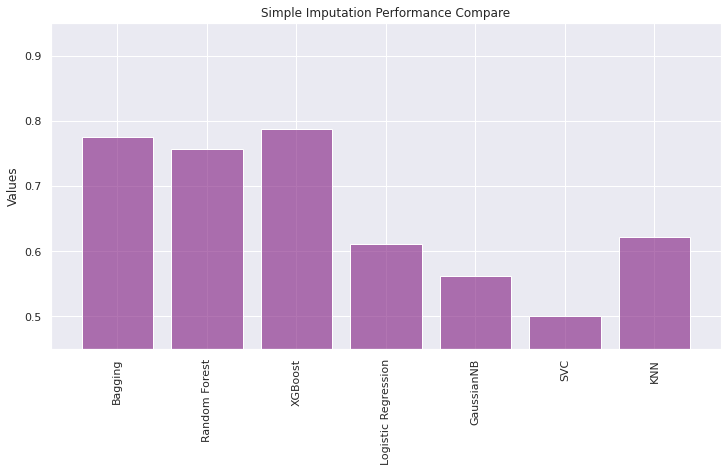

In [0]:
#Visualization performance
simple_imputation = ['Bagging','Random Forest','XGBoost','Logistic Regression','GaussianNB','SVC','KNN']
performances = [torbalama_ROC_train, rastgele_ormanlar_ROC_train, XGB_ROC_train,logr_ROC_train,gb_ROC_train,svc_ROC_train,KNN_ROC_train]
simple_imputation_data_predictions = [torbalama_ROC_test, rastgele_ormanlar_ROC_test, XGB_ROC_test,logr_ROC_test,gb_ROC_test,svc_ROC_test,KNN_ROC_test]
y_pos = np.arange(len(simple_imputation))
plt.figure(figsize=(12,6))
plt.bar(y_pos, simple_imputation_data_predictions, color = (0.5,0.1,0.5,0.6))
plt.title('Simple Imputation Performance Compare')

plt.ylabel('Values')
plt.ylim(0.45,0.95) #sınır

plt.xticks(y_pos, simple_imputation,rotation = 'vertical')
plt.show()

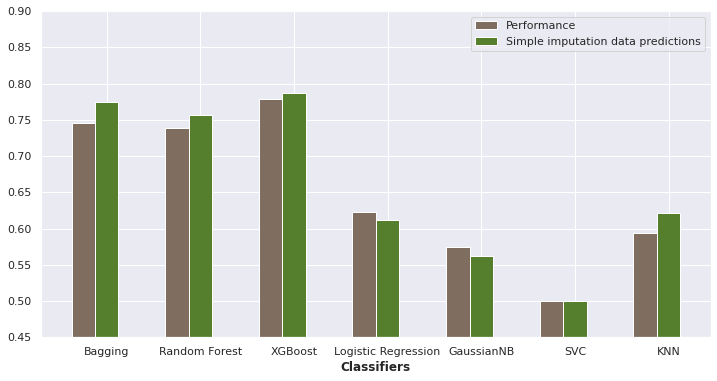

In [0]:
#Vizualization performance + predictions
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(performances))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(12,6))
simple_imputation = ['Bagging','Random Forest','XGBoost','Logistic Regression','GaussianNB','SVC','KNN']
plt.bar(r1, performances, color='#7f6d5f', width=barWidth, edgecolor='white', label='Performance')
plt.bar(r2, simple_imputation_data_predictions, color='#557f2d', width=barWidth, edgecolor='white', label='Simple imputation data predictions')

plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(performances))], simple_imputation)
plt.ylim(0.45,0.9)
plt.legend()
plt.show()

In [0]:
SimpleDataAnalysis(Xgboost_X_train)

Simple data analysis has began :

Simple data analysis has been completed in 0.0007123708724975586 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
0,LOAN,4172,0,0.0,float,"[45900.0, 27300.0, 31900.0, 5500.0, 7100.0, 12...",439
1,MORTDUE,4172,0,0.0,float,"[52720.0, 97373.0, 23517.0, 71644.0, 54000.0, ...",3520
2,VALUE,4172,0,0.0,float,"[115224.0, 126102.0, 47805.0, 72696.0, 74800.0...",3748
3,REASON,4172,0,0.0,object,"[0.0, 1.0, 0.5]",3
4,JOB,4172,0,0.0,object,"[2.0, 1.0, 4.0, 0.0, 3.0, 0.5, 5.0]",7
5,YOJ,4172,0,0.0,float,"[0.5, 10.0, 0.0, 4.0, 7.5, 19.0, 3.0, 15.0, 2....",80
6,DEROG,4172,0,0.0,float,"[0.0, 2.0, 1.0, 0.5, 3.0, 6.0, 5.0, 8.0, 4.0, ...",11
7,DELINQ,4172,0,0.0,float,"[1.0, 0.0, 2.0, 0.5, 5.0, 3.0, 6.0, 4.0, 7.000...",10
8,CLAGE,4172,0,0.0,float,"[126.11651831, 139.13259829, 78.813600281, 150...",3722
9,NINQ,4172,0,0.0,float,"[0.0, 4.0, 10.0, 1.0, 3.0, 2.0, 0.5, 7.0, 5.0,...",13


# XGBOOST ile eksik verileri doldurulan veri modelleniyor.

In [0]:
# Gerekli paketler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_wine
 

cgs = KFold(n_splits=10) # 10 katlı çapraz geçerlilik sınaması objesinin yaratılması
agac = DecisionTreeClassifier(criterion = 'entropy') # torbalamada ve AdaBoost'ta kullanılacak karar ağacı objesinin yaratılması

train_pred_to1 = cross_val_predict(torbalama, Xgboost_X_train, y_train, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile torbalama modelinin performansının kaydedilmesi
test_pred_to1 = torbalama.fit(Xgboost_X_train, y_train).predict(Xgboost_X_test)
torbalama_ROC_train1 = metrics.roc_auc_score(y_train, train_pred_to1)
torbalama_ROC_test1 =  metrics.roc_auc_score(y_test, test_pred_to1)




rastgele_ormanlar = RandomForestClassifier(n_estimators = 5, max_features = 3) # her ağaçta maksimum 3 öznitelik kullanılarak 5 farklı ağaç oluşturan rastgele ormanlar objesinin yaratılması
train_pred_ro1 = cross_val_predict(rastgele_ormanlar, Xgboost_X_train, y_train, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile rastgele ormanlar modelinin performansının kaydedilmesi
test_pred_ro1 = rastgele_ormanlar.fit(Xgboost_X_train, y_train).predict(Xgboost_X_test)
rastgele_ormanlar_ROC_train1 = metrics.roc_auc_score(y_train, train_pred_ro1)
rastgele_ormanlar_ROC_test1 = metrics.roc_auc_score(y_test, test_pred_ro1)




Xgboost_X_train2=X_train_outlier_cleaned.copy() #Burada imputation yapmadan Xgboost hepsini kendi yaptığı bir model
Xgboost_X_test2=X_test_outlier_cleaned.copy()

for i in ("REASON","JOB"):
    Xgboost_X_train2[i] = pd.to_numeric(Xgboost_X_test2[i], errors='coerce')
    Xgboost_X_test2[i] = pd.to_numeric(Xgboost_X_test2[i], errors='coerce')  
modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.09,
    boosting_type = 'gbtree',n_estimators = 200,
    tree_method = 'auto',max_depth=7,
    n_jobs = -1,
    subsample = 0.7)
train_pred_XGB1 = cross_val_predict(modelxgb, Xgboost_X_train2, y_train, cv = cgs) # 
test_pred_XGB1 = modelxgb.fit(Xgboost_X_train2, y_train).predict(Xgboost_X_test2)


XGB_ROC_train1 = metrics.roc_auc_score(y_train, train_pred_XGB1)
XGB_ROC_test1 = metrics.roc_auc_score(y_test, test_pred_XGB1)




#   < - - - - - - - - - - - - - - - - >
logr = LogisticRegression(class_weight='balanced')

train_pred_logr1 = cross_val_predict(logr, Xgboost_X_train, y_train, cv = cgs )
test_pred_logr1 = logr.fit(Xgboost_X_train, y_train).predict(Xgboost_X_test)


logr_ROC_train1 = metrics.roc_auc_score(y_train, train_pred_logr1)
logr_ROC_test1 = metrics.roc_auc_score(y_test, test_pred_logr1)


gb = GaussianNB()
train_pred_gb1 = cross_val_predict(gb, Xgboost_X_train, y_train, cv = cgs)
test_pred_gb1 = gb.fit(Xgboost_X_train, y_train).predict(Xgboost_X_test)
gb_ROC_train1 = metrics.roc_auc_score(y_train, train_pred_gb1)
gb_ROC_test1 = metrics.roc_auc_score(y_test, test_pred_gb1)


svc = SVC(kernel = 'rbf')
train_pred_svc1 = cross_val_predict(svc, Xgboost_X_train, y_train, cv=cgs)
test_pred_svc1 = svc.fit(Xgboost_X_train, y_train).predict(Xgboost_X_test)
svc_ROC_train1 = metrics.roc_auc_score(y_train, train_pred_svc1)
svc_ROC_test1 = metrics.roc_auc_score(y_test, test_pred_svc1)


knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski')
train_pred_KNN1 = cross_val_predict(knn, Xgboost_X_train, y_train, cv = cgs)
test_pred_KNN1 = knn.fit(Xgboost_X_train, y_train).predict(Xgboost_X_test)
KNN_ROC_train1 = metrics.roc_auc_score(y_train, train_pred_KNN1)
KNN_ROC_test1 = metrics.roc_auc_score(y_test, test_pred_KNN1)


In [0]:
models_names_x={"Bagging":[round(torbalama_ROC_train1*100,2),  round(torbalama_ROC_test1*100,2)],
         "Random Forest":[round(rastgele_ormanlar_ROC_train1*100,2),round(rastgele_ormanlar_ROC_test1*100,2)],
         "XGB":[round(XGB_ROC_train1*100,2),  round(XGB_ROC_test1*100,2)],
         "Logistic Reg":[round(logr_ROC_train1*100,2),round(logr_ROC_test1*100,2)],
         "GaussianNB ":[round(gb_ROC_train1*100,2),round(gb_ROC_test1*100,2)],
         "SVC ":[round(svc_ROC_train1*100,2),round(svc_ROC_test1*100,2)],
         "KNN ":[round( KNN_ROC_train1*100,2),round( KNN_ROC_test1*100,2)]}
index=["Roc_Score_for_train","Roc_Score_for_test"]
df_models=pd.DataFrame(models_names_x)
df_models.index=index
df_models

,Bagging,Random Forest,XGB,Logistic Reg,GaussianNB,SVC,KNN
Roc_Score_for_train,79.18,80.14,83.81,75.44,76.87,52.91,62.63
Roc_Score_for_test,79.65,80.82,86.14,76.26,76.82,53.76,64.56


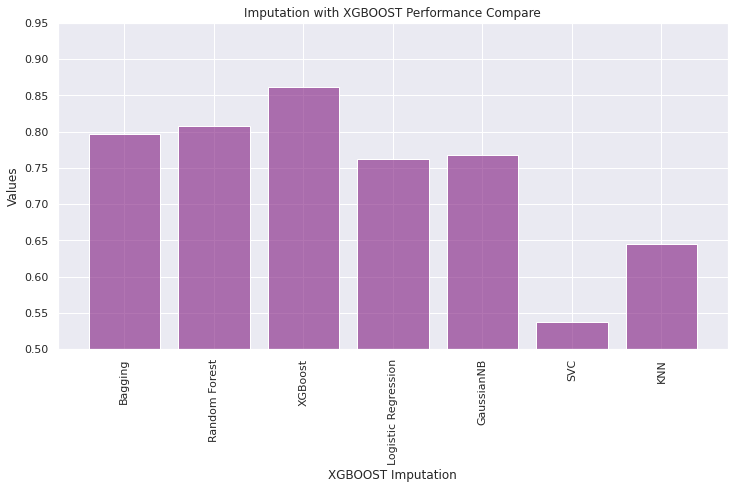

In [0]:
#Visualization performance
xgboost_imputation = ['Bagging','Random Forest','XGBoost','Logistic Regression','GaussianNB','SVC','KNN']
performances = [torbalama_ROC_train1, rastgele_ormanlar_ROC_train1,XGB_ROC_train1,logr_ROC_train1,gb_ROC_train1,svc_ROC_train1,KNN_ROC_train1]
y_pos = np.arange(len(xgboost_imputation))
plt.figure(figsize=(12,6))
xgboost_imputation_data_predictions = [torbalama_ROC_test1, rastgele_ormanlar_ROC_test1,XGB_ROC_test1,logr_ROC_test1,gb_ROC_test1,svc_ROC_test1,KNN_ROC_test1]
plt.bar(y_pos, xgboost_imputation_data_predictions, color = (0.5,0.1,0.5,0.6))
plt.title('Imputation with XGBOOST Performance Compare')
plt.xlabel('XGBOOST Imputation')
plt.ylabel('Values')
plt.ylim(0.50,0.95) #sınır


plt.xticks(y_pos, xgboost_imputation,rotation = 'vertical')
plt.show()

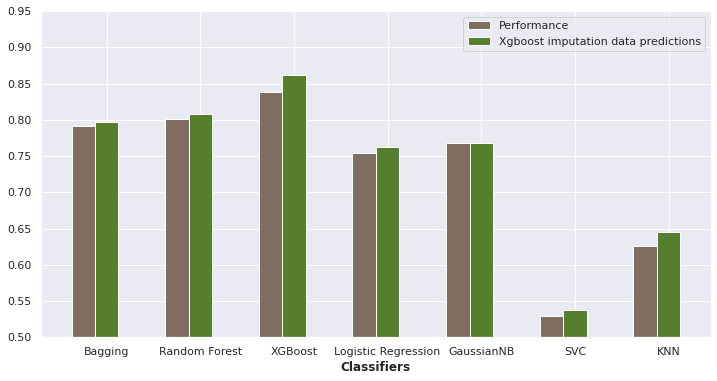

In [0]:
#Vizualization performance + predictions
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(performances))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(12,6))
xgboost_imputation = ['Bagging','Random Forest','XGBoost','Logistic Regression','GaussianNB','SVC','KNN']
plt.bar(r1, performances, color='#7f6d5f', width=barWidth, edgecolor='white', label='Performance')
plt.bar(r2, xgboost_imputation_data_predictions, color='#557f2d', width=barWidth, edgecolor='white', label='Xgboost imputation data predictions')

plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(performances))], xgboost_imputation)
plt.ylim(0.50,0.95)
plt.legend()
plt.show()

# KNN ile eksik verileri doldurulan veri seti modelleniyor .

In [0]:
# Gerekli paketler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_wine
 

cgs = KFold(n_splits=10) # 10 katlı çapraz geçerlilik sınaması objesinin yaratılması
agac = DecisionTreeClassifier(criterion = 'entropy') # torbalamada ve AdaBoost'ta kullanılacak karar ağacı objesinin yaratılması

train_pred_to2 = cross_val_predict(torbalama, KNN_X_train, y_train, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile torbalama modelinin performansının kaydedilmesi
test_pred_to2 = torbalama.fit(KNN_X_train, y_train).predict(KNN_X_test)
torbalama_ROC_train2 = metrics.roc_auc_score(y_train, train_pred_to2)
torbalama_ROC_test2 =  metrics.roc_auc_score(y_test, test_pred_to2)

rastgele_ormanlar = RandomForestClassifier(n_estimators = 5, max_features = 3) # her ağaçta maksimum 3 öznitelik kullanılarak 5 farklı ağaç oluşturan rastgele ormanlar objesinin yaratılması
train_pred_ro2 = cross_val_predict(rastgele_ormanlar, KNN_X_train, y_train, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile rastgele ormanlar modelinin performansının kaydedilmesi
test_pred_ro2 = rastgele_ormanlar.fit(KNN_X_train, y_train).predict(KNN_X_test)
rastgele_ormanlar_ROC_train2 = metrics.roc_auc_score(y_train, train_pred_ro2)
rastgele_ormanlar_ROC_test2 = metrics.roc_auc_score(y_test, test_pred_ro2)

modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.09,
    boosting_type = 'gbtree',n_estimators = 200,
    tree_method = 'auto',max_depth=7,
    n_jobs = -1,
    subsample = 0.7 )
train_pred_XGB2 = cross_val_predict(modelxgb, KNN_X_train, y_train, cv = cgs) # 
test_pred_XGB2 = modelxgb.fit(KNN_X_train, y_train).predict(KNN_X_test)
XGB_ROC_train2 = metrics.roc_auc_score(y_train, train_pred_XGB)
XGB_ROC_test2 = metrics.roc_auc_score(y_test, test_pred_XGB)

#   < - - - - - - - - - - - - - - - - >
logr = LogisticRegression(class_weight='balanced')

train_pred_logr2 = cross_val_predict(logr, KNN_X_train, y_train, cv = cgs )
test_pred_logr2 = logr.fit(KNN_X_train, y_train).predict(KNN_X_test)
logr_ROC_train2 = metrics.roc_auc_score(y_train, train_pred_logr)
logr_ROC_test2 = metrics.roc_auc_score(y_test, test_pred_logr)

gb = GaussianNB()
train_pred_gb2 = cross_val_predict(gb, KNN_X_train, y_train, cv = cgs)
test_pred_gb2 = gb.fit(KNN_X_train, y_train).predict(KNN_X_test)
gb_ROC_train2 = metrics.roc_auc_score(y_train, train_pred_gb2)
gb_ROC_test2 = metrics.roc_auc_score(y_test, test_pred_gb2)

svc = SVC(kernel = 'rbf')
train_pred_svc2 = cross_val_predict(svc, KNN_X_train, y_train, cv=cgs)
test_pred_svc2 = svc.fit(KNN_X_train, y_train).predict(KNN_X_test)
svc_ROC_train2 = metrics.roc_auc_score(y_train, train_pred_svc2)
svc_ROC_test2 = metrics.roc_auc_score(y_test, test_pred_svc2)


knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski')
train_pred_KNN2 = cross_val_predict(knn, KNN_X_train, y_train, cv = cgs)
test_pred_KNN2 = knn.fit(KNN_X_train, y_train).predict(KNN_X_test)
KNN_ROC_train2 = metrics.roc_auc_score(y_train, train_pred_KNN2)
KNN_ROC_test2 = metrics.roc_auc_score(y_test, test_pred_KNN2)


In [0]:
models_names={"Bagging":[round(torbalama_ROC_train2*100,2),  round(torbalama_ROC_test2*100,2)],
         "Random Forest":[round(rastgele_ormanlar_ROC_train2*100,2),round(rastgele_ormanlar_ROC_test2*100,2)],
         "XGB":[round(XGB_ROC_train2*100,2),  round(XGB_ROC_test2*100,2)],
         "Logistic Reg":[round(logr_ROC_train2*100,2),round(logr_ROC_test2*100,2)],
         "GaussianNB ":[round(gb_ROC_train2*100,2),round(gb_ROC_test2*100,2)],
         "SVC ":[round(svc_ROC_train2*100,2),round(svc_ROC_test2*100,2)],
         "KNN ":[round( KNN_ROC_train2*100,2),round( KNN_ROC_test2*100,2)]}
index=["Roc_Score_for_train","Roc_Score_for_test"]
df_modelss=pd.DataFrame(models_names)
df_modelss.index=index
df_modelss

,Bagging,Random Forest,XGB,Logistic Reg,GaussianNB,SVC,KNN
Roc_Score_for_train,73.80,74.64,77.86,62.32,57.09,50.0,58.80
Roc_Score_for_test,76.35,74.48,78.68,61.12,55.39,50.0,60.76


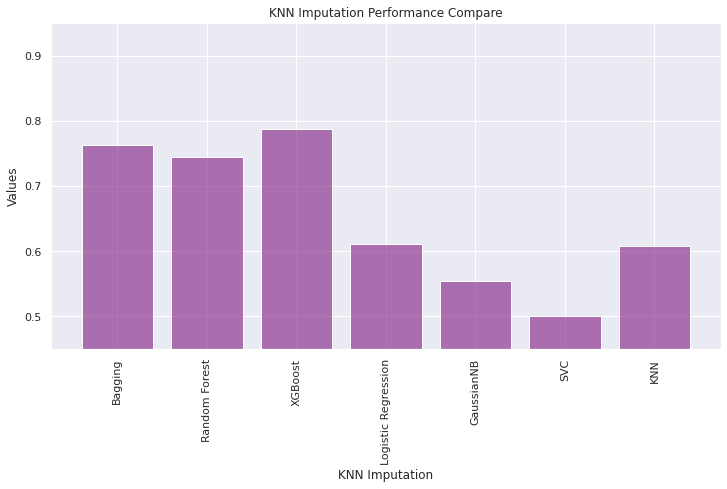

In [0]:
#Visualization performance
KNN_imputation = ['Bagging','Random Forest','XGBoost','Logistic Regression','GaussianNB','SVC','KNN']
performances = [torbalama_ROC_train2, rastgele_ormanlar_ROC_train2,XGB_ROC_train2,logr_ROC_train2,gb_ROC_train2,svc_ROC_train2,KNN_ROC_train2]
KNN_imputation_data_predictions = [torbalama_ROC_test2, rastgele_ormanlar_ROC_test2,XGB_ROC_test2,logr_ROC_test2,gb_ROC_test2,svc_ROC_test2,KNN_ROC_test2]
y_pos = np.arange(len(KNN_imputation))
plt.figure(figsize=(12,6))
plt.bar(y_pos, KNN_imputation_data_predictions, color = (0.5,0.1,0.5,0.6))
plt.title('KNN Imputation Performance Compare')
plt.xlabel('KNN Imputation')
plt.ylabel('Values')
plt.ylim(0.45,0.95) #sınır

plt.xticks(y_pos, KNN_imputation,rotation = 'vertical')
plt.show()

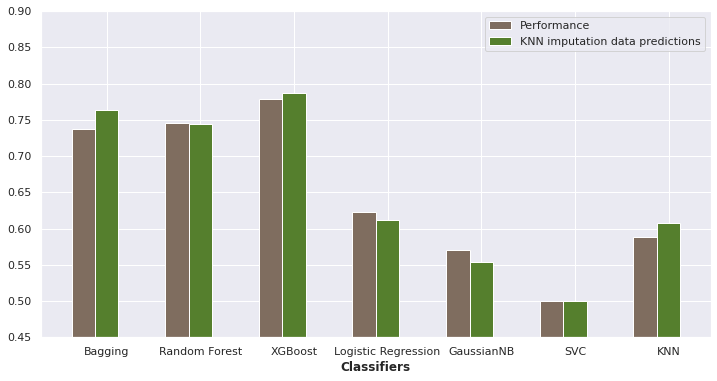

In [0]:
#Vizualization performance + predictions
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(performances))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(12,6))

plt.bar(r1, performances, color='#7f6d5f', width=barWidth, edgecolor='white', label='Performance')
plt.bar(r2, KNN_imputation_data_predictions, color='#557f2d', width=barWidth, edgecolor='white', label='KNN imputation data predictions')

plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(performances))], KNN_imputation)
plt.ylim(0.45,0.90)
plt.legend()
plt.show()

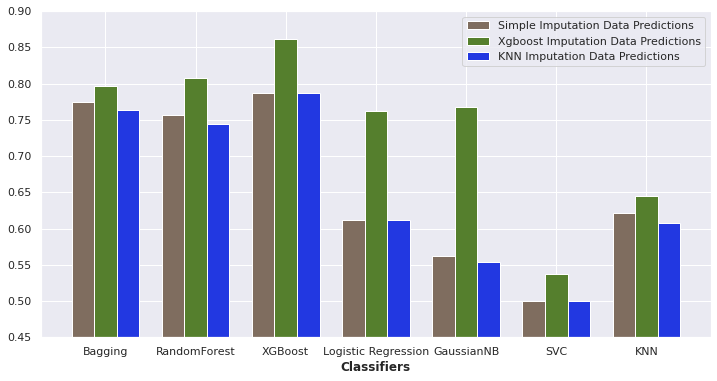

In [0]:
#Vizualization performance + predictions
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(simple_imputation_data_predictions))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.figure(figsize=(12,6))

plt.bar(r1, simple_imputation_data_predictions, color='#7f6d5f', width=barWidth, edgecolor='white', label='Simple Imputation Data Predictions')
plt.bar(r2, xgboost_imputation_data_predictions, color='#557f2d', width=barWidth, edgecolor='white', label='Xgboost Imputation Data Predictions')
plt.bar(r3, KNN_imputation_data_predictions, color='#2238E1', width=barWidth, edgecolor='white', label='KNN Imputation Data Predictions')
classifiers = ['Bagging','RandomForest','XGBoost','Logistic Regression','GaussianNB','SVC','KNN']
plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(simple_imputation_data_predictions))], classifiers)
plt.ylim(0.45,0.90)
plt.legend()
plt.show()

# Değerlendirme
İncelemeler sonucunda; en yüksek başarıyı sağladığımız durum ; eksik verileri XGBoost'la doldurup modellemeyi de XGBoost üzerinden yaptığımız durum oldu. 

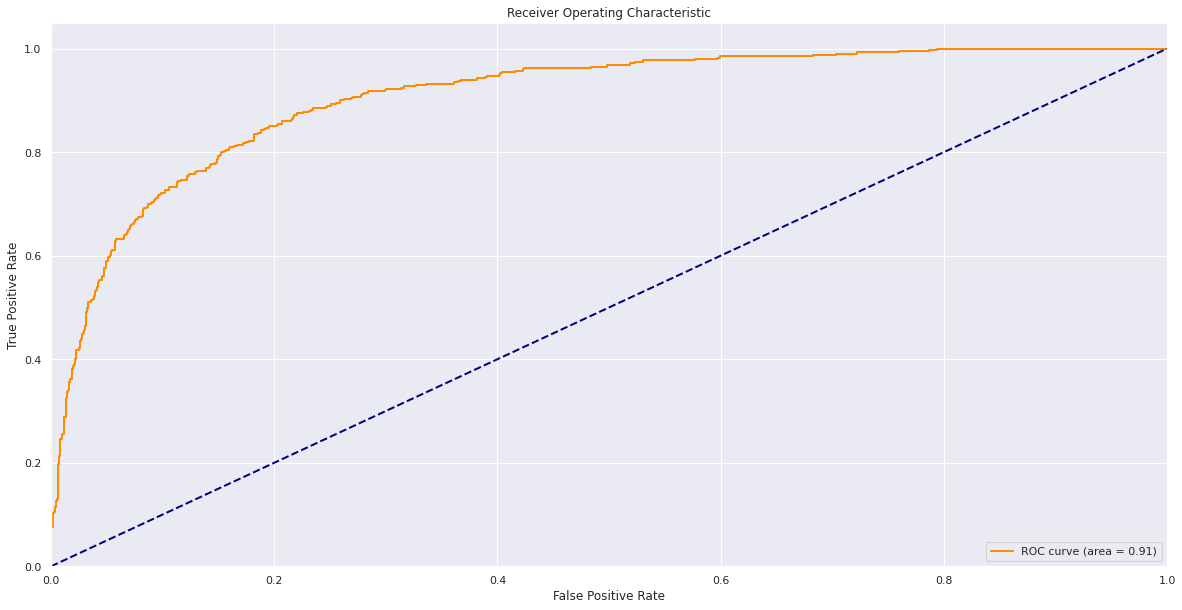

In [0]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, roc_curve
xg_probs = modelxgb.predict_proba(Xgboost_X_test2)
xg_preds = xg_probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, xg_preds)
roc_auc_xgb = auc(fpr, tpr)


lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()